In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv('data/anonymized_data.csv')

In [4]:
df.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
EJWY     500 non-null float64
VALM     500 non-null float64
EGXO     500 non-null float64
HTGR     500 non-null float64
SKRF     500 non-null float64
NNSZ     500 non-null float64
NYLC     500 non-null float64
GWID     500 non-null float64
TVUT     500 non-null float64
CJHI     500 non-null float64
NVFW     500 non-null float64
VLBG     500 non-null float64
IDIX     500 non-null float64
UVHN     500 non-null float64
IWOT     500 non-null float64
LEMB     500 non-null float64
QMYY     500 non-null float64
XDGR     500 non-null float64
ODZS     500 non-null float64
LNJS     500 non-null float64
WDRT     500 non-null float64
LKKS     500 non-null float64
UOBF     500 non-null float64
VBHE     500 non-null float64
FRWU     500 non-null float64
NDYZ     500 non-null float64
QSBO     500 non-null float64
JDUB     500 non-null float64
TEVK     500 non-null float64
EZTM     500 non-null flo

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

In [8]:
scaled_data = scaler.fit_transform(df.drop('Label', axis=1))

In [10]:
# Linear autoencoder
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [11]:
num_inputs = 30
num_hidden = 2
num_outputs = num_inputs

In [12]:
learning_rate = 0.01

In [13]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [14]:
hidden = fully_connected(X, num_hidden, activation_fn=None)

In [15]:
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

In [16]:
loss = tf.reduce_mean(tf.square(X-outputs))

In [18]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [20]:
init = tf.global_variables_initializer()

In [22]:
num_steps = 1000

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(
            train,
            feed_dict = {X: scaled_data}
        )

In [24]:
with tf.Session() as sess:
    sess.run(init)
    output_2d = hidden.eval(feed_dict = {X: scaled_data})
output_2d.shape

(500, 2)

In [25]:
output_2d

array([[ 0.1329702 ,  0.93555737],
       [-0.46462208,  0.22605139],
       [-0.39250714,  0.18083243],
       [-0.23071362,  0.71711636],
       [ 0.10765004,  0.64904821],
       [-0.44525385,  0.42185941],
       [-0.52716023,  0.19631945],
       [-0.30622637,  0.33417478],
       [ 0.07252393,  0.72013533],
       [-0.04434717,  0.64550686],
       [-0.01169071,  0.80460644],
       [-0.43939573,  0.07790949],
       [-0.73196781,  0.30958372],
       [ 0.1957504 ,  0.64307481],
       [-0.39654922,  0.16181973],
       [ 0.13767946,  0.65634733],
       [-0.58601552,  0.4728727 ],
       [-0.27142972,  1.0361557 ],
       [-0.23659919,  0.21663517],
       [-0.4835737 ,  0.51567316],
       [-0.55724716,  0.15096119],
       [ 0.18898277,  0.84280807],
       [-0.21992981,  0.07731526],
       [ 0.05723263,  0.63098121],
       [ 0.3477636 ,  0.81910986],
       [ 0.17119646,  0.83076966],
       [-0.15930536,  0.85651112],
       [-0.53797954,  0.43571621],
       [ 0.11134474,

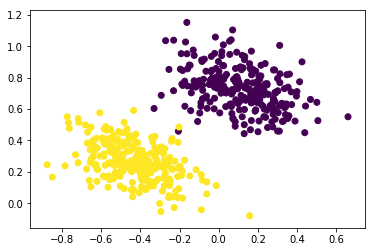

In [27]:
plt.scatter(output_2d[:, 0], output_2d[:, 1], c = df['Label'])